In [15]:
import pandas as pd
import numpy as np


In [4]:
data = pd.read_csv('household_power_consumption.csv',delimiter=';')

C:\Users\Gbadamosi\AppData\Local\Temp\ipykernel_13072\3997081885.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('household_power_consumption.csv',delimiter=';')


In [5]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [11]:
data.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [10]:
data.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [13]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [46]:
cols = data.columns
cols

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [44]:
for col in cols: 
    data.col = data.col.apply(pd.to_numeric, errors = 'coerce')
#     print(col)
#     if col == 'Date': 
#         data.col = pd.to_datetime(data[col], format = '%d/%m/%Y')
#     elif col == 'Time':
#         data.col = pd.to_datetime(data[col], format = '%H:%M:%S', errors = 'coerce').dt.time
#         data.col = data.col.apply(pd.to_numeric, errors = 'coerce')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(6), object(3)
memory usage: 156.3+ MB


In [53]:
data.Date = pd.to_datetime(data['Date'], format = '%d/%m/%Y')
data.Time = pd.to_datetime(data['Time'], format = '%H:%M:%S', errors = 'coerce').dt.time

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 156.3+ MB


In [83]:
data.loc[6830:6840]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6830,2006-12-21,11:14:00,0.974,0.12,239.62,4.8,0.0,0.0,0.0
6831,2006-12-21,11:15:00,0.562,0.00,240.02,3.4,0.0,0.0,0.0
6832,2006-12-21,11:16:00,0.250,0.00,240.32,1.0,0.0,0.0,0.0
6833,2006-12-21,11:17:00,0.240,0.00,240.57,1.0,0.0,0.0,0.0
6834,2006-12-21,11:18:00,0.242,0.00,241.13,1.0,0.0,0.0,0.0
6835,2006-12-21,11:19:00,0.244,0.00,242.05,1.0,0.0,0.0,0.0
6836,2006-12-21,11:20:00,0.244,0.00,242.08,1.0,0.0,0.0,0.0
6837,2006-12-21,11:21:00,0.242,0.00,241.67,1.0,0.0,0.0,0.0
6838,2006-12-21,11:22:00,0.244,0.00,242.29,1.0,0.0,0.0,0.0


In [75]:
data.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [63]:
data1 = data.drop(['Date', 'Time'], axis = 1)

In [80]:
data1.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [65]:
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [101]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

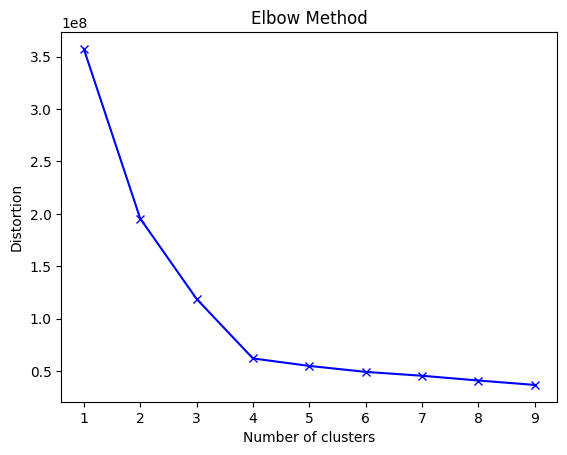

In [71]:
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data1)
    distortions.append(kmeans.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [78]:
scaler = MinMaxScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

In [79]:
kmeans = KMeans(n_clusters=4, random_state=42)
K_labels = kmeans.fit_predict(data2) # predicting with normalized data
# unnorm_K_labels = kmeans.fit_predict(clust_Data_numeric) # predicting without normalized data

In [84]:
data2_numpy = data2.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [86]:
from mpl_toolkits.mplot3d import Axes3D

In [96]:
npdata = data1.to_numpy()

In [99]:
X= npdata
X

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]])

In [102]:
# create a scatter plot
fig = plt.figure(figsize=(7, 6)) # set the size of the figure
ax = Axes3D(fig) # define that you want a 3D figure
# define which data is x, y, z
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c = K_labels, cmap = 'viridis')
# Add labels to the plot and a title
ax.set_title("3 clusters")

Text(0.5, 0.92, '3 clusters')

<Figure size 700x600 with 0 Axes>